In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [8]:
df = pd.read_csv("../../datasets/Bengaloredataset/bangalore_inflation_dataset.csv")
print(df.head())

         Date       CPI  GDP_Growth  Unemployment_Rate  Crude_Oil_Prices  \
0  2007-01-31  4.318798    2.246895           7.220601         41.382887   
1  2007-02-28  5.553752    7.239423          10.231640         57.094225   
2  2007-03-31  4.200890    4.729275           7.419760         63.795917   
3  2007-04-30  4.750935    3.620667           5.795134         98.315315   
4  2007-05-31  7.757629    4.751309           6.885443         78.348297   

   Gold_Prices  Real_Estate_Index   Stock_Index  Money_Supply_M1  \
0  1537.035107         135.252643  21528.193539         5.834372   
1  1585.088973         136.279335  21842.671646         5.199187   
2  1544.457971         123.954010  30149.436287         6.348152   
3  1755.773163         126.866871  24002.048457        10.478388   
4  1309.536724         140.203776  26346.390005         7.321637   

   Money_Supply_M2  Industrial_Production  Retail_Sales  Exchange_Rate  
0         9.409519               5.487314      8.974610      

In [9]:
print(df.shape)
print(" Columns : ",df.columns)

(200, 13)
 Columns :  Index(['Date', 'CPI', 'GDP_Growth', 'Unemployment_Rate', 'Crude_Oil_Prices',
       'Gold_Prices', 'Real_Estate_Index', 'Stock_Index', 'Money_Supply_M1',
       'Money_Supply_M2', 'Industrial_Production', 'Retail_Sales',
       'Exchange_Rate'],
      dtype='object')


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   200 non-null    object 
 1   CPI                    200 non-null    float64
 2   GDP_Growth             200 non-null    float64
 3   Unemployment_Rate      200 non-null    float64
 4   Crude_Oil_Prices       200 non-null    float64
 5   Gold_Prices            200 non-null    float64
 6   Real_Estate_Index      200 non-null    float64
 7   Stock_Index            200 non-null    float64
 8   Money_Supply_M1        200 non-null    float64
 9   Money_Supply_M2        200 non-null    float64
 10  Industrial_Production  200 non-null    float64
 11  Retail_Sales           200 non-null    float64
 12  Exchange_Rate          200 non-null    float64
dtypes: float64(12), object(1)
memory usage: 20.4+ KB
None


In [11]:
print(df.describe())

              CPI  GDP_Growth  Unemployment_Rate  Crude_Oil_Prices  \
count  200.000000  200.000000         200.000000        200.000000   
mean     5.402142    6.077645           6.997591         67.909321   
std      1.529128    1.828938           1.267311         15.097178   
min      1.307239    0.940880           3.410637         26.395177   
25%      4.344511    4.747693           6.270335         58.700885   
50%      5.357977    6.165822           6.924285         68.198630   
75%      6.403514    7.251077           7.818876         78.280984   
max      9.838937   10.024541          11.711485        104.224778   

       Gold_Prices  Real_Estate_Index   Stock_Index  Money_Supply_M1  \
count   200.000000         200.000000    200.000000       200.000000   
mean   1518.820539         130.643052  23906.076520         9.816801   
std     212.787653          16.860122   2883.454180         3.034162   
min    1002.438269          79.975366  17051.568411         2.829087   
25%    13

In [12]:
print("Highest inflation year:")
print(df.loc[df['CPI'].idxmax()])

Highest inflation year:
Date                      2017-02-28
CPI                         9.838937
GDP_Growth                  4.988507
Unemployment_Rate           7.894006
Crude_Oil_Prices           60.817496
Gold_Prices              1319.186342
Real_Estate_Index           90.42016
Stock_Index              29109.51783
Money_Supply_M1            10.672704
Money_Supply_M2            11.588067
Industrial_Production        4.78547
Retail_Sales               10.148666
Exchange_Rate              77.589974
Name: 121, dtype: object


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Year']

0      2007
1      2007
2      2007
3      2007
4      2007
       ... 
195    2023
196    2023
197    2023
198    2023
199    2023
Name: Year, Length: 200, dtype: int32

In [14]:
df1 = df[(df['Year'] >= 2006) & (df['Year'] <= 2015)]
df1

,Date,CPI,GDP_Growth,Unemployment_Rate,Crude_Oil_Prices,Gold_Prices,Real_Estate_Index,Stock_Index,Money_Supply_M1,Money_Supply_M2,Industrial_Production,Retail_Sales,Exchange_Rate,Year
0,2007-01-31,4.318798,2.246895,7.220601,41.382887,1537.035107,135.252643,21528.193539,5.834372,9.409519,5.487314,8.974610,73.920197,2007
1,2007-02-28,5.553752,7.239423,10.231640,57.094225,1585.088973,136.279335,21842.671646,5.199187,11.906390,2.819583,10.143860,79.687387,2007
2,2007-03-31,4.200890,4.729275,7.419760,63.795917,1544.457971,123.954010,30149.436287,6.348152,12.054051,3.028921,6.241434,83.175332,2007
3,2007-04-30,4.750935,3.620667,5.795134,98.315315,1755.773163,126.866871,24002.048457,10.478388,13.417891,3.060513,8.697190,81.558467,2007
4,2007-05-31,7.757629,4.751309,6.885443,78.348297,1309.536724,140.203776,26346.390005,7.321637,7.899425,5.221071,7.749651,69.539292,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2015-08-31,4.306991,8.047419,7.395410,86.059158,1294.849463,131.158557,21489.237889,7.172326,14.658574,6.406856,8.825998,77.889893,2015
104,2015-09-30,3.801178,6.498617,5.179392,59.055963,1720.164280,124.474416,23578.874823,14.844336,11.812081,2.385260,7.571865,77.886818,2015
105,2015-10-31,4.247533,8.090177,7.900695,75.421260,1712.274193,110.421281,24922.838005,9.033916,12.729370,1.804256,8.758811,74.356703,2015
106,2015-11-30,9.624335,6.289776,6.500567,50.602877,1606.401240,129.694756,22426.298959,13.976296,11.117272,3.739950,9.380945,82.034674,2015


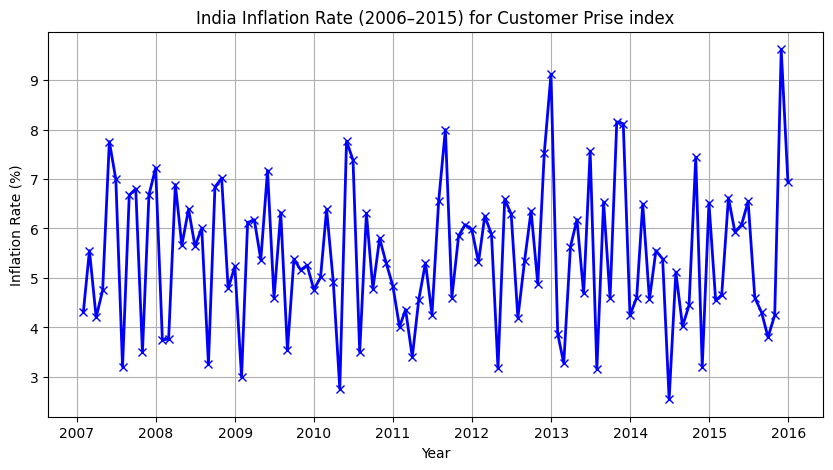

In [15]:
plt.figure(figsize=(10,5))
plt.plot(df1['Date'], df1['CPI'], marker='x',linewidth=2, color='blue')
plt.title('India Inflation Rate (2006–2015) for Customer Prise index')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.show()

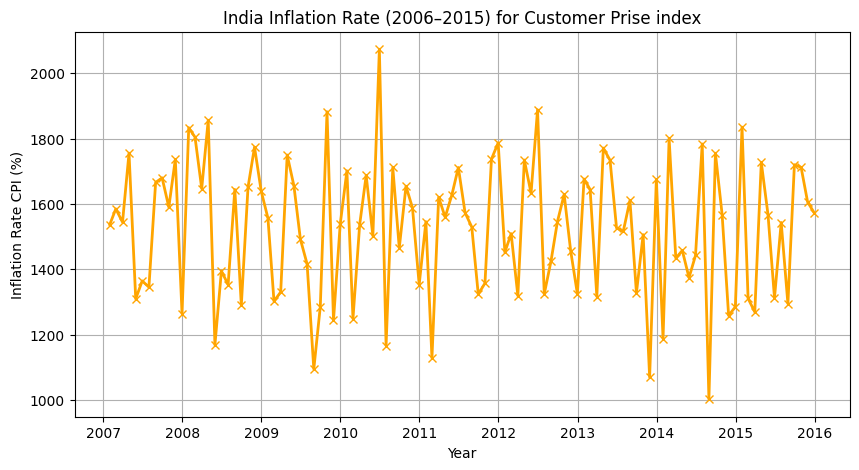

In [16]:
plt.figure(figsize=(10,5))
plt.plot(df1['Date'], df1['Gold_Prices'], marker='x',linewidth=2, color='orange')
plt.title('India Inflation Rate (2006–2015) for Customer Prise index')
plt.xlabel('Year')
plt.ylabel('Inflation Rate CPI (%)')
plt.grid(True)
plt.show()

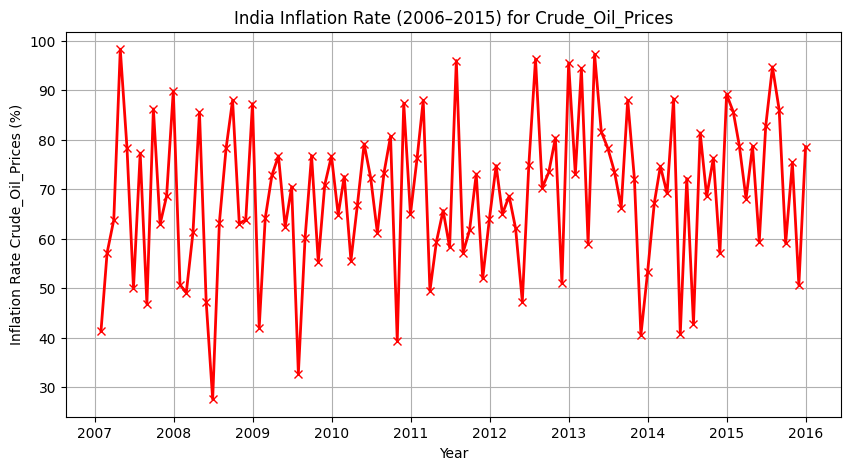

In [18]:
plt.figure(figsize=(10,5))
plt.plot(df1['Date'], df1['Crude_Oil_Prices'], marker='x',linewidth=2, color='red')
plt.title('India Inflation Rate (2006–2015) for Crude_Oil_Prices')
plt.xlabel('Year')
plt.ylabel('Inflation Rate Crude_Oil_Prices (%)')
plt.grid(True)
plt.show()

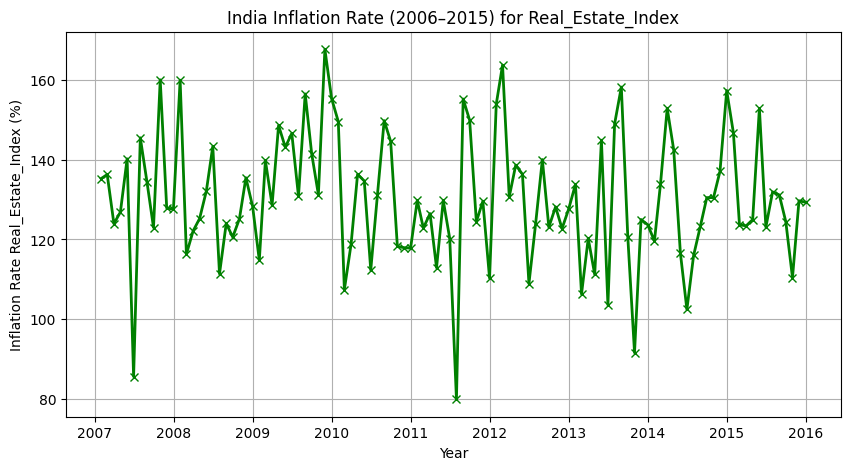

In [19]:
plt.figure(figsize=(10,5))
plt.plot(df1['Date'], df1['Real_Estate_Index'], marker='x',linewidth=2, color='green')
plt.title('India Inflation Rate (2006–2015) for Real_Estate_Index')
plt.xlabel('Year')
plt.ylabel('Inflation Rate Real_Estate_Index (%)')
plt.grid(True)
plt.show()

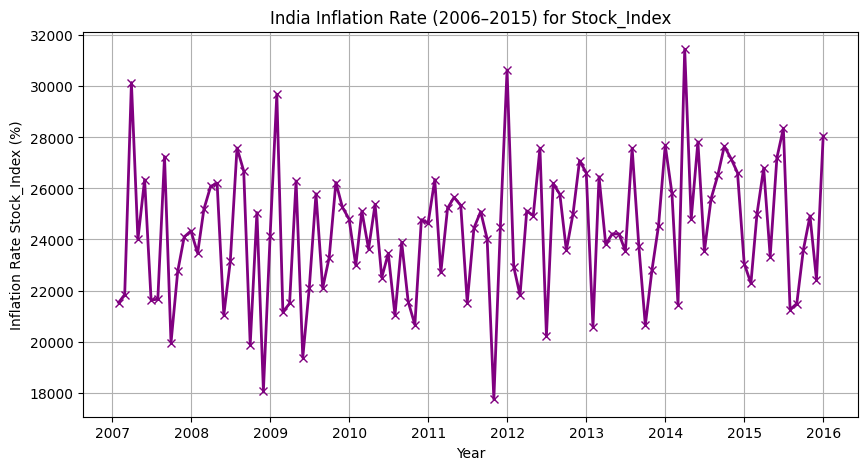

In [20]:
plt.figure(figsize=(10,5))
plt.plot(df1['Date'], df1['Stock_Index'], marker='x',linewidth=2, color='purple')
plt.title('India Inflation Rate (2006–2015) for Stock_Index')
plt.xlabel('Year')
plt.ylabel('Inflation Rate Stock_Index (%)')
plt.grid(True)
plt.show()

In [21]:
df2 = df[(df['Year'] >= 2016) & (df['Year'] <= 2023)]
df2

,Date,CPI,GDP_Growth,Unemployment_Rate,Crude_Oil_Prices,Gold_Prices,Real_Estate_Index,Stock_Index,Money_Supply_M1,Money_Supply_M2,Industrial_Production,Retail_Sales,Exchange_Rate,Year
108,2016-01-31,3.326957,5.297172,6.459985,76.759051,1852.237625,132.135164,25272.200585,11.757713,11.398942,4.606156,9.315526,79.776346,2016
109,2016-02-29,3.151606,9.126827,8.508579,41.952755,1499.937265,122.401408,24118.341145,7.789690,12.695526,4.070838,7.860935,74.806286,2016
110,2016-03-31,5.919149,4.363143,6.357598,52.573242,1263.625175,145.909080,19692.271428,5.754198,15.438090,5.088718,5.626013,71.958246,2016
111,2016-04-30,6.385952,9.064735,7.430144,65.752917,1589.894783,129.545301,20052.552551,10.655602,9.667886,1.508585,10.115628,77.962652,2016
112,2016-05-31,6.288749,6.999728,6.122852,65.487104,1917.209410,155.481132,24843.027751,13.028415,16.676368,5.989411,6.821776,77.048181,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2023-04-30,1.919873,4.303143,7.092977,41.799849,1222.802412,145.053340,23023.166844,10.085373,10.512365,2.284965,8.316178,68.679969,2023
196,2023-05-31,4.532232,7.146256,7.309303,80.690680,1601.117848,120.546520,23506.994382,3.766565,15.291901,3.198657,7.444911,77.430924,2023
197,2023-06-30,6.239508,2.428267,5.509887,41.752747,1797.822622,143.422524,24636.280059,9.039107,7.303056,3.071600,10.582548,65.253141,2023
198,2023-07-31,7.261726,5.280741,7.401012,64.415214,1954.289949,130.810003,21019.923901,14.930134,2.977103,7.160112,8.843560,64.748213,2023


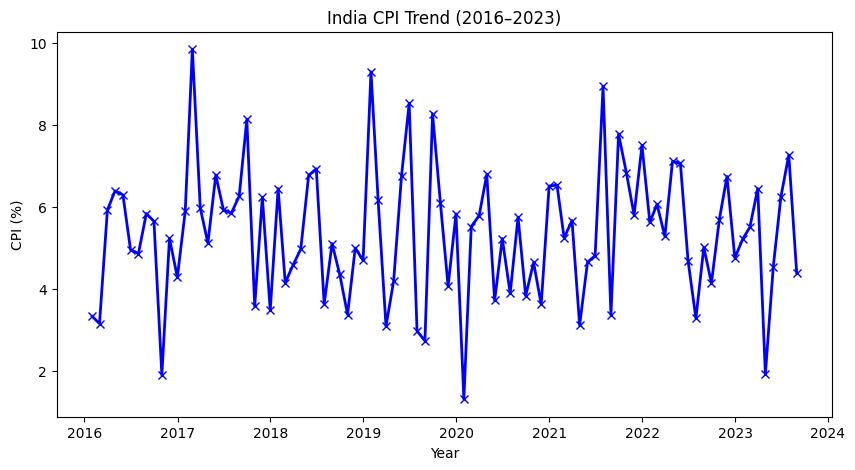

In [22]:
plt.figure(figsize=(10,5))
plt.plot(df2['Date'], df2['CPI'], marker='x', linewidth=2, color='blue')
plt.title('India CPI Trend (2016–2023)')
plt.xlabel('Year')
plt.ylabel('CPI (%)')
plt.show()

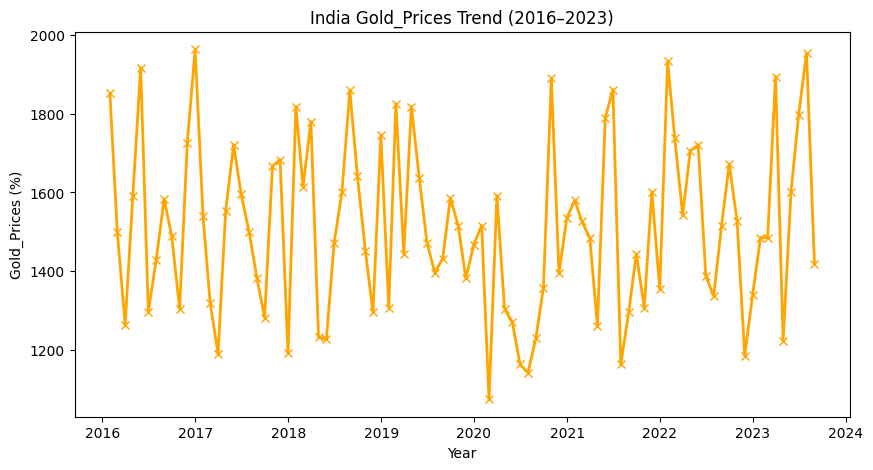

In [23]:
plt.figure(figsize=(10,5))
plt.plot(df2['Date'], df2['Gold_Prices'], marker='x', linewidth=2, color='orange')
plt.title('India Gold_Prices Trend (2016–2023)')
plt.xlabel('Year')
plt.ylabel('Gold_Prices (%)')
plt.show()

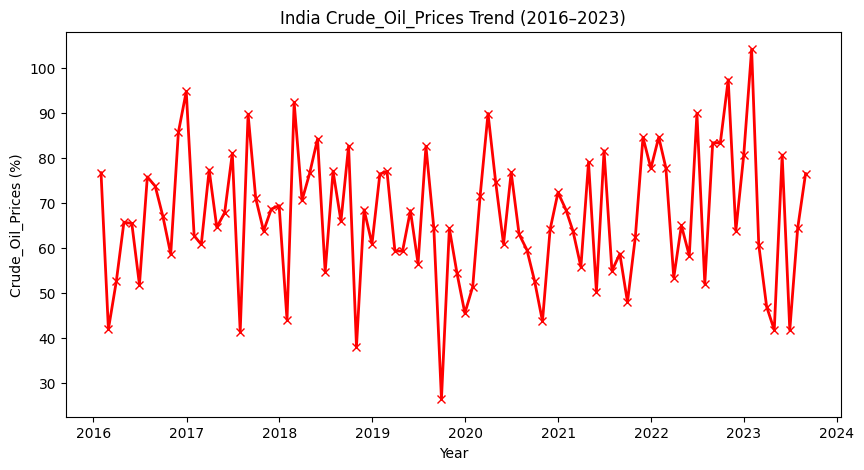

In [24]:
plt.figure(figsize=(10,5))
plt.plot(df2['Date'], df2['Crude_Oil_Prices'], marker='x', linewidth=2, color='red')
plt.title('India Crude_Oil_Prices Trend (2016–2023)')
plt.xlabel('Year')
plt.ylabel('Crude_Oil_Prices (%)')
plt.show()

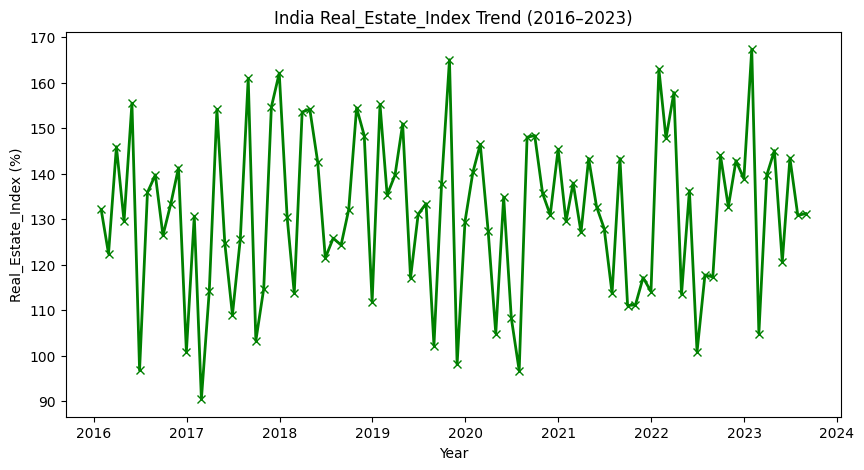

In [25]:
plt.figure(figsize=(10,5))
plt.plot(df2['Date'], df2['Real_Estate_Index'], marker='x', linewidth=2, color='green')
plt.title('India Real_Estate_Index Trend (2016–2023)')
plt.xlabel('Year')
plt.ylabel('Real_Estate_Index (%)')
plt.show()

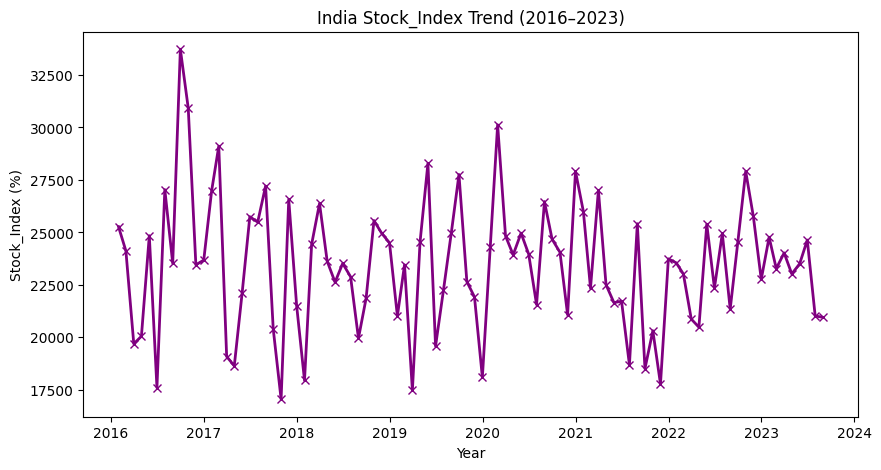

In [26]:
plt.figure(figsize=(10,5))
plt.plot(df2['Date'], df2['Stock_Index'], marker='x', linewidth=2, color='purple')
plt.title('India Stock_Index Trend (2016–2023)')
plt.xlabel('Year')
plt.ylabel('Stock_Index (%)')
plt.show()

In [27]:
df1

,Date,CPI,GDP_Growth,Unemployment_Rate,Crude_Oil_Prices,Gold_Prices,Real_Estate_Index,Stock_Index,Money_Supply_M1,Money_Supply_M2,Industrial_Production,Retail_Sales,Exchange_Rate,Year
0,2007-01-31,4.318798,2.246895,7.220601,41.382887,1537.035107,135.252643,21528.193539,5.834372,9.409519,5.487314,8.974610,73.920197,2007
1,2007-02-28,5.553752,7.239423,10.231640,57.094225,1585.088973,136.279335,21842.671646,5.199187,11.906390,2.819583,10.143860,79.687387,2007
2,2007-03-31,4.200890,4.729275,7.419760,63.795917,1544.457971,123.954010,30149.436287,6.348152,12.054051,3.028921,6.241434,83.175332,2007
3,2007-04-30,4.750935,3.620667,5.795134,98.315315,1755.773163,126.866871,24002.048457,10.478388,13.417891,3.060513,8.697190,81.558467,2007
4,2007-05-31,7.757629,4.751309,6.885443,78.348297,1309.536724,140.203776,26346.390005,7.321637,7.899425,5.221071,7.749651,69.539292,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2015-08-31,4.306991,8.047419,7.395410,86.059158,1294.849463,131.158557,21489.237889,7.172326,14.658574,6.406856,8.825998,77.889893,2015
104,2015-09-30,3.801178,6.498617,5.179392,59.055963,1720.164280,124.474416,23578.874823,14.844336,11.812081,2.385260,7.571865,77.886818,2015
105,2015-10-31,4.247533,8.090177,7.900695,75.421260,1712.274193,110.421281,24922.838005,9.033916,12.729370,1.804256,8.758811,74.356703,2015
106,2015-11-30,9.624335,6.289776,6.500567,50.602877,1606.401240,129.694756,22426.298959,13.976296,11.117272,3.739950,9.380945,82.034674,2015


In [28]:
df2

,Date,CPI,GDP_Growth,Unemployment_Rate,Crude_Oil_Prices,Gold_Prices,Real_Estate_Index,Stock_Index,Money_Supply_M1,Money_Supply_M2,Industrial_Production,Retail_Sales,Exchange_Rate,Year
108,2016-01-31,3.326957,5.297172,6.459985,76.759051,1852.237625,132.135164,25272.200585,11.757713,11.398942,4.606156,9.315526,79.776346,2016
109,2016-02-29,3.151606,9.126827,8.508579,41.952755,1499.937265,122.401408,24118.341145,7.789690,12.695526,4.070838,7.860935,74.806286,2016
110,2016-03-31,5.919149,4.363143,6.357598,52.573242,1263.625175,145.909080,19692.271428,5.754198,15.438090,5.088718,5.626013,71.958246,2016
111,2016-04-30,6.385952,9.064735,7.430144,65.752917,1589.894783,129.545301,20052.552551,10.655602,9.667886,1.508585,10.115628,77.962652,2016
112,2016-05-31,6.288749,6.999728,6.122852,65.487104,1917.209410,155.481132,24843.027751,13.028415,16.676368,5.989411,6.821776,77.048181,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2023-04-30,1.919873,4.303143,7.092977,41.799849,1222.802412,145.053340,23023.166844,10.085373,10.512365,2.284965,8.316178,68.679969,2023
196,2023-05-31,4.532232,7.146256,7.309303,80.690680,1601.117848,120.546520,23506.994382,3.766565,15.291901,3.198657,7.444911,77.430924,2023
197,2023-06-30,6.239508,2.428267,5.509887,41.752747,1797.822622,143.422524,24636.280059,9.039107,7.303056,3.071600,10.582548,65.253141,2023
198,2023-07-31,7.261726,5.280741,7.401012,64.415214,1954.289949,130.810003,21019.923901,14.930134,2.977103,7.160112,8.843560,64.748213,2023


In [29]:
df4 = df[(df['Year'] >= 2006) & (df['Year'] <= 2023)]
df4

,Date,CPI,GDP_Growth,Unemployment_Rate,Crude_Oil_Prices,Gold_Prices,Real_Estate_Index,Stock_Index,Money_Supply_M1,Money_Supply_M2,Industrial_Production,Retail_Sales,Exchange_Rate,Year
0,2007-01-31,4.318798,2.246895,7.220601,41.382887,1537.035107,135.252643,21528.193539,5.834372,9.409519,5.487314,8.974610,73.920197,2007
1,2007-02-28,5.553752,7.239423,10.231640,57.094225,1585.088973,136.279335,21842.671646,5.199187,11.906390,2.819583,10.143860,79.687387,2007
2,2007-03-31,4.200890,4.729275,7.419760,63.795917,1544.457971,123.954010,30149.436287,6.348152,12.054051,3.028921,6.241434,83.175332,2007
3,2007-04-30,4.750935,3.620667,5.795134,98.315315,1755.773163,126.866871,24002.048457,10.478388,13.417891,3.060513,8.697190,81.558467,2007
4,2007-05-31,7.757629,4.751309,6.885443,78.348297,1309.536724,140.203776,26346.390005,7.321637,7.899425,5.221071,7.749651,69.539292,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2023-04-30,1.919873,4.303143,7.092977,41.799849,1222.802412,145.053340,23023.166844,10.085373,10.512365,2.284965,8.316178,68.679969,2023
196,2023-05-31,4.532232,7.146256,7.309303,80.690680,1601.117848,120.546520,23506.994382,3.766565,15.291901,3.198657,7.444911,77.430924,2023
197,2023-06-30,6.239508,2.428267,5.509887,41.752747,1797.822622,143.422524,24636.280059,9.039107,7.303056,3.071600,10.582548,65.253141,2023
198,2023-07-31,7.261726,5.280741,7.401012,64.415214,1954.289949,130.810003,21019.923901,14.930134,2.977103,7.160112,8.843560,64.748213,2023


In [30]:
# Feature engineering
df_yearly = df4.groupby('Year').mean().reset_index()

df_yearly['CPI_lag1'] = df_yearly['CPI'].shift(1)
lag_cols = ['GDP_Growth', 'Unemployment_Rate', 'Crude_Oil_Prices', 
            'Gold_Prices', 'Real_Estate_Index', 'Stock_Index',
            'Money_Supply_M1', 'Money_Supply_M2', 'Industrial_Production', 
            'Retail_Sales', 'Exchange_Rate']

for col in lag_cols:
    df_yearly[f'{col}_lag1'] = df_yearly[col].shift(1)

df_yearly = df_yearly.dropna().reset_index(drop=True)
df_yearly

,Year,Date,CPI,GDP_Growth,Unemployment_Rate,Crude_Oil_Prices,Gold_Prices,Real_Estate_Index,Stock_Index,Money_Supply_M1,...,Unemployment_Rate_lag1,Crude_Oil_Prices_lag1,Gold_Prices_lag1,Real_Estate_Index_lag1,Stock_Index_lag1,Money_Supply_M1_lag1,Money_Supply_M2_lag1,Industrial_Production_lag1,Retail_Sales_lag1,Exchange_Rate_lag1
0,2008,2008-07-15 20:00:00,5.435467,6.884649,7.249343,63.748941,1588.101360,128.660503,23877.750260,8.525579,...,6.905077,68.386775,1531.617894,130.540248,23795.355623,8.633126,10.562376,3.590755,8.322957,75.150800
1,2009,2009-07-15 22:00:00,5.235858,6.794545,7.153887,63.420638,1462.414143,142.032524,23965.689996,9.747600,...,7.249343,63.748941,1588.101360,128.660503,23877.750260,8.525579,11.460762,4.843930,7.246849,75.007889
2,2010,2010-07-15 22:00:00,5.396220,5.489736,7.237131,68.188666,1557.557472,128.222496,23301.724743,10.421759,...,7.153887,63.420638,1462.414143,142.032524,23965.689996,9.747600,10.991479,4.775997,6.814767,73.868926
3,2011,2011-07-15 22:00:00,5.246977,6.631815,6.938390,66.748121,1541.912826,124.290187,24434.235990,9.083545,...,7.237131,68.188666,1557.557472,128.222496,23301.724743,10.421759,12.817834,5.410734,7.613715,73.910643
4,2012,2012-07-15 20:00:00,5.910921,5.558853,6.949214,71.616878,1520.260747,133.155193,24738.148342,9.828106,...,6.938390,66.748121,1541.912826,124.290187,24434.235990,9.083545,12.552436,5.286273,8.101307,75.102803
5,2013,2013-07-15 22:00:00,5.500723,5.357781,6.038008,73.111927,1531.204382,124.007641,24152.775356,8.771350,...,6.949214,71.616878,1520.260747,133.155193,24738.148342,9.828106,11.747701,4.843332,9.112842,74.977739
6,2014,2014-07-15 22:00:00,4.990866,6.214138,7.104162,68.951860,1445.795738,130.211296,25957.925493,9.570672,...,6.038008,73.111927,1531.204382,124.007641,24152.775356,8.771350,10.655666,4.480538,8.325563,75.900191
7,2015,2015-07-15 22:00:00,5.657580,7.282918,6.661753,74.819284,1539.370157,129.307782,24557.672301,11.041171,...,7.104162,68.951860,1445.795738,130.211296,25957.925493,9.570672,12.852797,4.888692,8.003422,73.835459
8,2016,2016-07-15 20:00:00,4.813114,6.056008,7.507837,67.525042,1576.007254,129.981658,24494.477227,9.644284,...,6.661753,74.819284,1539.370157,129.307782,24557.672301,11.041171,12.286684,3.738463,7.091227,75.674003
9,2017,2017-07-15 22:00:00,6.084482,7.313081,7.318695,68.226293,1468.317963,128.699610,23328.918489,10.534483,...,7.507837,67.525042,1576.007254,129.981658,24494.477227,9.644284,11.514533,4.821710,7.536792,77.549148


In [31]:
# Creating sequence for GRU RNN Model
def create_sequences(df, feature_cols, target_col, n_steps):
    X, y = [], []
    data = df[feature_cols + [target_col]].values
    for i in range(n_steps, len(df)):
        X.append(data[i-n_steps:i, :-1])  
        y.append(data[i, -1])            
    return np.array(X), np.array(y)


feature_cols = ['GDP_Growth', 'Unemployment_Rate', 'Crude_Oil_Prices',
                'Gold_Prices', 'Real_Estate_Index', 'Stock_Index',
                'Money_Supply_M1', 'Money_Supply_M2', 'Industrial_Production',
                'Retail_Sales', 'Exchange_Rate', 'CPI_lag1']

target_col = 'CPI'
n_steps = 4
X, y = create_sequences(df_yearly, feature_cols, target_col, n_steps)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (12, 4, 12)
y shape: (12,)


In [32]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [33]:
from sklearn.preprocessing import StandardScaler

scaler_y = StandardScaler()
y_train_s = scaler_y.fit_transform(y_train.reshape(-1,1)).flatten()
y_test_s  = scaler_y.transform(y_test.reshape(-1,1)).flatten()

In [34]:
Sequential = tf.keras.models.Sequential
GRU = tf.keras.layers.GRU
Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout
Adam = tf.keras.optimizers.Adam
l2 = tf.keras.regularizers.l2

model = Sequential([
    GRU(16, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(8, activation='tanh'),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l2(1e-4)),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

c:\Web development\GRU-RNN_InflationModel\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 4, 16)          │         1,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,225 (8.69 KB)

 Trainable params: 2,225 (8.69 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# from tensorflow.keras.callbacks import EarlyStopping
EarlyStopping = tf.keras.callbacks.EarlyStopping
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6, verbose=1)

history = model.fit(
    X_train, y_train_s,
    epochs=500,
    batch_size=4,
    validation_data=(X_test, y_test_s),
    callbacks=[early_stop, reduce_lr],
    verbose=2
)

Epoch 1/500
3/3 - 0s - 161ms/step - loss: 1.0056 - root_mean_squared_error: 1.0023 - val_loss: 0.4016 - val_root_mean_squared_error: 0.6330 - learning_rate: 3.1250e-05
Epoch 2/500
3/3 - 0s - 92ms/step - loss: 1.0461 - root_mean_squared_error: 1.0223 - val_loss: 0.4017 - val_root_mean_squared_error: 0.6330 - learning_rate: 3.1250e-05
Epoch 3/500
3/3 - 1s - 189ms/step - loss: 0.9849 - root_mean_squared_error: 0.9919 - val_loss: 0.4017 - val_root_mean_squared_error: 0.6330 - learning_rate: 3.1250e-05
Epoch 4/500
3/3 - 1s - 190ms/step - loss: 0.9053 - root_mean_squared_error: 0.9510 - val_loss: 0.4018 - val_root_mean_squared_error: 0.6331 - learning_rate: 3.1250e-05
Epoch 5/500
3/3 - 0s - 135ms/step - loss: 0.9510 - root_mean_squared_error: 0.9747 - val_loss: 0.4018 - val_root_mean_squared_error: 0.6331 - learning_rate: 3.1250e-05
Epoch 6/500
3/3 - 0s - 139ms/step - loss: 1.0683 - root_mean_squared_error: 1.0331 - val_loss: 0.4018 - val_root_mean_squared_error: 0.6331 - learning_rate: 3.12

In [39]:
y_pred_s = model.predict(X_test)
y_pred   = scaler_y.inverse_transform(y_pred_s).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


In [40]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

eps = 1e-8
rel_err = np.abs((y_test - y_pred) / (np.where(np.abs(y_test) < eps, eps, y_test)))
pct_within_20 = np.mean(rel_err < 0.20) * 100

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"% within 20% error: {pct_within_20:.2f}%")

MSE: 0.0893
RMSE: 0.2989
MAE: 0.2468
R2 Score: -0.2122
% within 20% error: 100.00%


   Year  CPI_actual  CPI_pred
0  2021    5.847910   5.37022
1  2022    5.450377   5.37022
2  2023    5.187529   5.37022


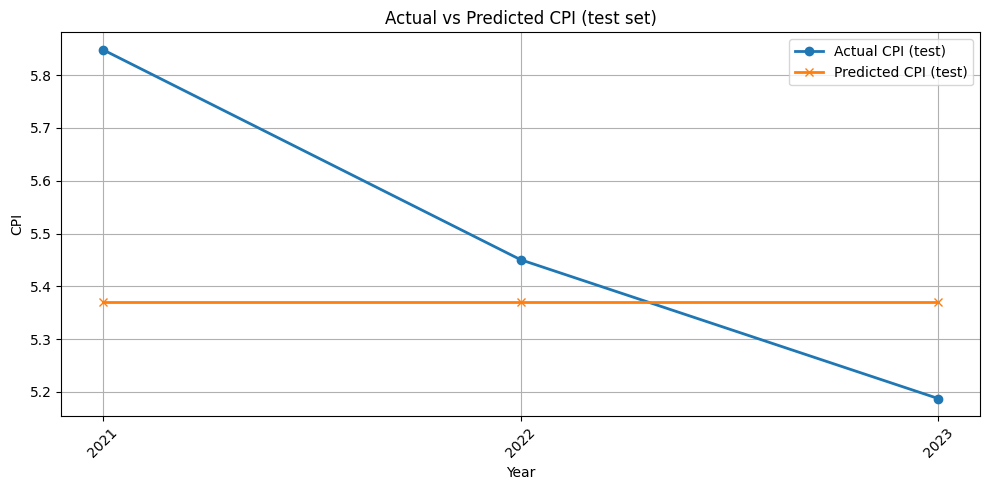

In [41]:
years_test = df_yearly['Year'].iloc[n_steps + train_size :].values  # indices that correspond to y_test
cmp_df = pd.DataFrame({
    'Year': years_test,
    'CPI_actual': y_test,
    'CPI_pred': y_pred
}).reset_index(drop=True)

print(cmp_df.head())

plt.figure(figsize=(10,5))
plt.plot(cmp_df['Year'], cmp_df['CPI_actual'], marker='o', linewidth=2, color='tab:blue', label='Actual CPI (test)')
plt.plot(cmp_df['Year'], cmp_df['CPI_pred'], marker='x', linewidth=2, color='tab:orange', label='Predicted CPI (test)')
plt.title('Actual vs Predicted CPI (test set)')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.grid(True)
plt.legend()
plt.xticks(cmp_df['Year'], rotation=45)
plt.tight_layout()
plt.show()

In [42]:
import os
import joblib

In [45]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
models_folder = os.path.join(project_root, 'models')
os.makedirs(models_folder, exist_ok=True)
model_path = os.path.join(models_folder, 'gru_model2.h5')

In [46]:
model.save(model_path)
print(f"GRU model saved at: {model_path}")

GRU model saved at: c:\Web development\GRU-RNN_InflationModel\models\gru_model2.h5


In [47]:
scaler = StandardScaler()

scaler_path = os.path.join(models_folder, 'scaler2.save')
joblib.dump(scaler, scaler_path)
print(f"Scaler saved at: {scaler_path}")

Scaler saved at: c:\Web development\GRU-RNN_InflationModel\models\scaler2.save
